In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [26]:
weather = pd.read_csv("1. Weather Data.csv")
weather.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


#### What are the dimensions (rows and columns) of the dataset?

In [27]:
rows, columns = weather.shape
print("Number of rows:", rows)
print("Number of columns:", columns)


Number of rows: 8784
Number of columns: 8


In [28]:
weather['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

#### What are the column names in the dataset?

In [29]:
column_names = weather.columns
print("Column names:", column_names)

Column names: Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')


#### What are the data types of the columns?

In [30]:
data_types = weather.dtypes
print("Data types:", data_types)

Data types: Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object


#### How many missing values are there in each column?

#### What are the summary statistics of numerical columns?

In [31]:
summary_stats = weather.describe()
print("Summary statistics:\n", summary_stats)

Summary statistics:
             Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h   
count  8784.000000       8784.000000  8784.000000      8784.000000  \
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


#### How many unique values are there in each column?

In [32]:
unique_values = weather.nunique()
print("Unique values:", unique_values)

Unique values: Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64


#### What is the distribution of a specific column (e.g., Temp_C)?

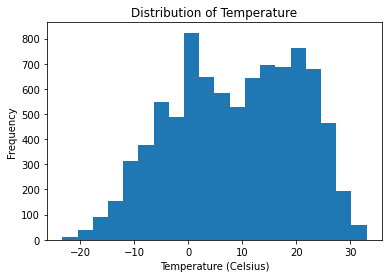

In [33]:
plt.hist(weather['Temp_C'], bins=20)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

#### What is the correlation between numerical columns?

In [34]:
numeric_columns = weather.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = weather[numeric_columns].corr()
print("Correlation matrix:\n", correlation_matrix)


Correlation matrix:
                     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h   
Temp_C            1.000000          0.932714  -0.220182        -0.061876  \
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   

                  Visibility_km  Press_kPa  
Temp_C                 0.273455  -0.236389  
Dew Point Temp_C       0.050813  -0.320616  
Rel Hum_%             -0.633683  -0.231424  
Wind Speed_km/h        0.004883  -0.356613  
Visibility_km          1.000000   0.231847  
Press_kPa              0.231847   1.000000  


#### Are there any outliers in numerical columns?

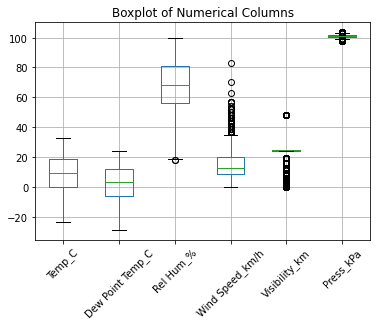

In [35]:
numeric_columns = weather.select_dtypes(include=['float64', 'int64']).columns
weather.boxplot(column=list(numeric_columns))
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Convert datetime column to datetime type
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'])

# Convert categorical columns to numeric using LabelEncoder
categorical_cols = ['Weather']  # Replace with the actual names of your categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    weather[col] = label_encoders[col].fit_transform(weather[col])

# Split the data into features (X) and target variable (y)
X = weather.drop(['Weather', 'Date/Time'], axis=1)  # Exclude target variable and datetime column
y = weather['Weather']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.5406943653955606


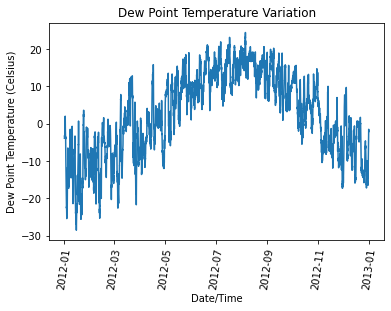

In [40]:
plt.plot(weather['Date/Time'], weather['Dew Point Temp_C'])
plt.xlabel('Date/Time')
plt.ylabel('Dew Point Temperature (Celsius)')
plt.title('Dew Point Temperature Variation')
plt.xticks(rotation=82)
plt.show()


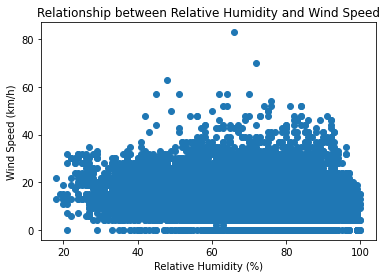

In [41]:
plt.scatter(weather['Rel Hum_%'], weather['Wind Speed_km/h'])
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Wind Speed (km/h)')
plt.title('Relationship between Relative Humidity and Wind Speed')
plt.show()


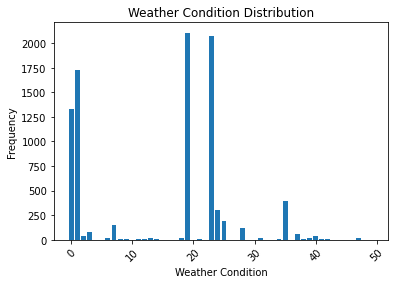

In [43]:
weather_counts = weather['Weather'].value_counts()
plt.bar(weather_counts.index, weather_counts.values)
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.title('Weather Condition Distribution')
plt.xticks(rotation=45)
plt.show()
